**Importing the Dependencies**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score

**Data Collection and Analysis**

In [26]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [27]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# no.of rows and columns in the dataset
diabetes_dataset.shape

(768, 9)

In [29]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**0 ---> Non-Diabetic**

**1 ---> Diabetic**




 

In [31]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [32]:
# separating the data and labels 
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [33]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [34]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [35]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Graphs**

In [36]:
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0.5, 1.05, 'correlation matrix of squared correlations \n\n\n\n\n')

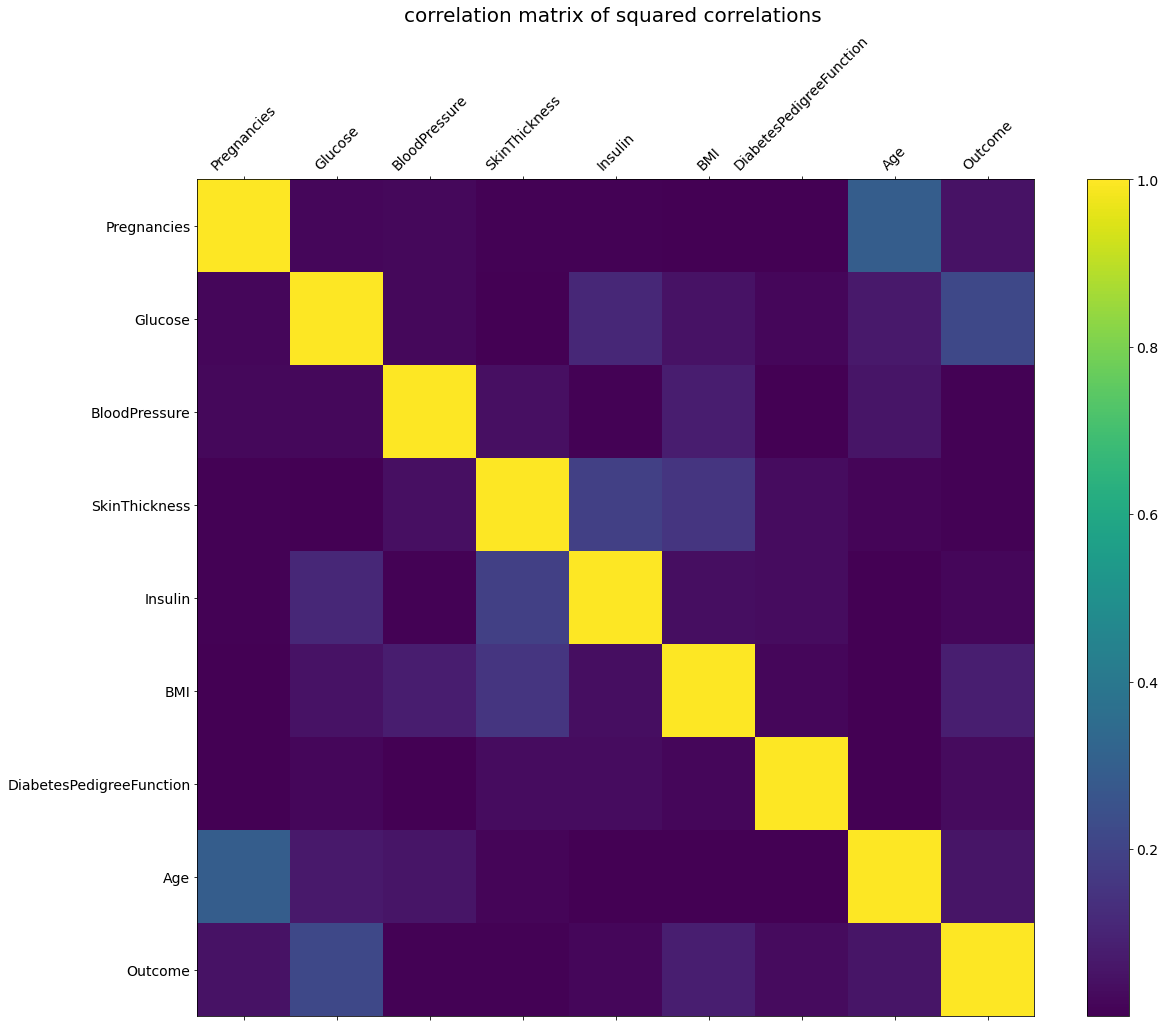

In [38]:
fig = plt.figure(figsize = (19,15))
plt.matshow(diabetes_dataset.corr()**2,fignum = fig.number)
plt.xticks(range(diabetes_dataset.shape[1]),diabetes_dataset.columns,fontsize = 14 , rotation = 45)
plt.yticks(range(diabetes_dataset.shape[1]),diabetes_dataset.columns,fontsize = 14 )
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title("correlation matrix of squared correlations \n\n\n\n\n",fontsize = 20) 

**check which columns are useful and which are not**

In [39]:
# 1 ---> Diabetic
# 0 ---> Non-Diabetic(healthy)
print(diabetes_dataset["Outcome"].value_counts())
fig = plt.figure(figsize=(10,6))

0    500
1    268
Name: Outcome, dtype: int64


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Glucose')

<Figure size 1152x432 with 0 Axes>

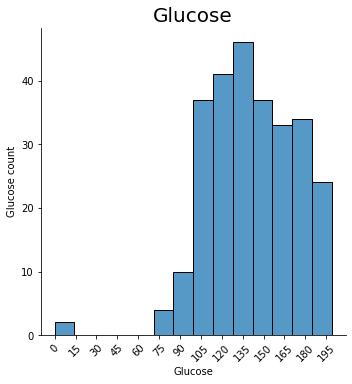

In [41]:
# glucose for diabetics
fig = plt.figure(figsize=(16,6))

sns.displot(diabetes_dataset["Glucose"][diabetes_dataset["Outcome"] == 1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Insulin')

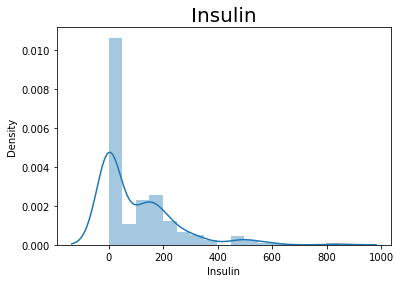

In [42]:
# insulin for diabetic
sns.distplot(diabetes_dataset["Insulin"][diabetes_dataset["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize =20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI')

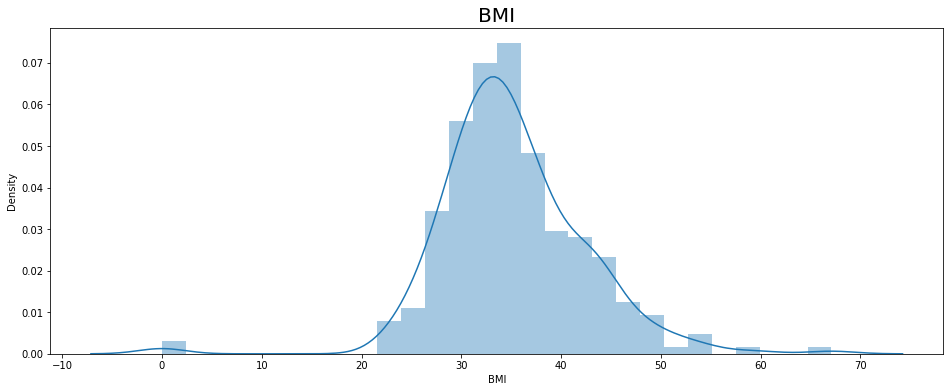

In [43]:
# BMI for diabetic
fig = plt.figure(figsize=(16,6))
sns.distplot(diabetes_dataset["BMI"][diabetes_dataset["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'diabetespedigreefunction')

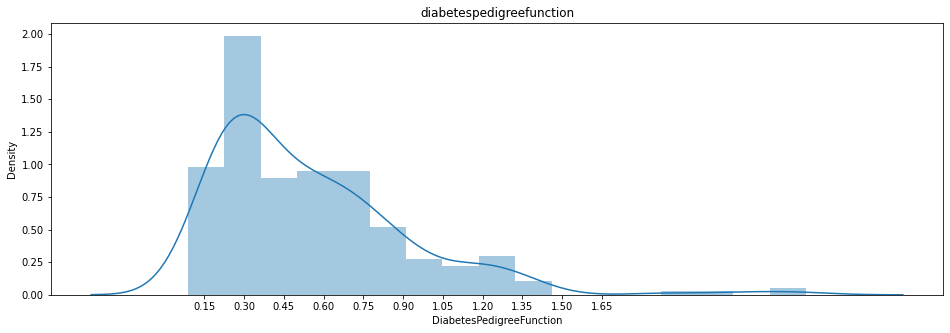

In [44]:
# diabeticPedigree function for diabetic
fig = plt.figure(figsize=(16,5))
sns.distplot(diabetes_dataset["DiabetesPedigreeFunction"][diabetes_dataset["Outcome"]==1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("diabetespedigreefunction")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

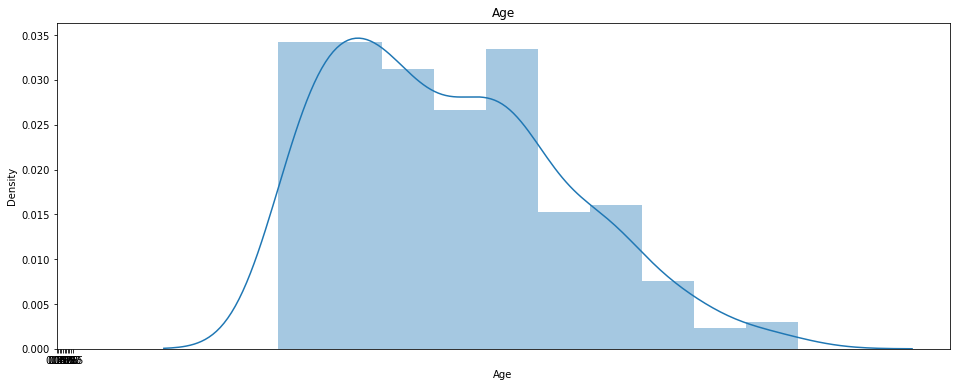

In [45]:
# Age for diabetic
fig = plt.figure(figsize=(16,6))
sns.distplot(diabetes_dataset["Age"][diabetes_dataset["Outcome"]==1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Age")

**Data pre-processing using standard scalar**

In [51]:
# separating dependent and independent columns
X = diabetes_dataset.drop(["Pregnancies","BloodPressure","SkinThickness"],axis=1)
y = diabetes_dataset.iloc[:,-1]

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =0)
print("X_train size : ",X_train.shape) 
print("y_train size : ", y_train.shape,"\n") 
print("X_test size : ", X_test.shape) 
print("y_test size : ", y_test.shape)

X_train size :  (614, 6)
y_train size :  (614,) 

X_test size :  (154, 6)
y_test size :  (154,)


In [54]:
# standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [55]:
print(sc)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [56]:
print(X_train)

[[ 0.91569367  0.3736349   0.37852648  0.67740401  1.69955804  1.33352186]
 [-0.75182191 -0.69965674 -0.50667229 -0.07049698 -0.96569189 -0.74989397]
 [ 1.38763205  5.09271083  2.54094063 -0.11855487 -0.88240283 -0.74989397]
 ...
 [-0.84620959 -0.69965674 -0.94927168 -0.95656442 -1.04898095 -0.74989397]
 [-1.12937261 -0.69965674 -0.26640405 -0.50001442  0.11706589 -0.74989397]
 [ 0.47521786 -0.69965674 -4.07275877  0.52121586  2.94889395 -0.74989397]]


In [57]:
print(X_test)

[[ 2.39507259e+00 -6.69261578e-01  1.52657475e+00  2.78935129e+00
  -9.30642826e-01  1.50883920e+00]
 [-4.25892449e-01  2.80308009e-01  3.19441160e-01 -2.76988247e-01
  -8.35980346e-01 -6.62761146e-01]
 [-1.37643502e+00 -6.69261578e-01  3.71360884e-01 -3.17253311e-01
  -6.46655385e-01 -6.62761146e-01]
 [ 1.38320470e+00  9.92485199e-01 -6.92993461e-01  2.89819971e-01
   1.81456910e+00  1.50883920e+00]
 [-3.03241795e-01 -6.69261578e-01 -8.48752633e-01  5.15923795e-01
  -7.86805031e-02 -6.62761146e-01]
 [-1.22312170e+00 -2.89433743e-01 -5.89154013e-01 -6.51763079e-01
  -7.41317865e-01 -6.62761146e-01]
 [ 9.53927407e-01  9.54502416e-01  3.97320746e-01  1.23759765e+00
   1.10644458e-01  1.50883920e+00]
 [ 1.68983133e+00  8.12066978e-01  2.80501367e-01  2.04599625e+00
   1.90923158e+00  1.50883920e+00]
 [ 1.87360820e-01  1.94205479e+00 -4.46374771e-01  3.42739770e+00
  -6.46655385e-01 -6.62761146e-01]
 [-5.48543103e-01  1.13492064e+00  8.51618332e-01 -5.24773260e-01
   2.19321902e+00 -6.6276

**ML MODELING**

---
**(1) KNN**


In [58]:
kn_classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p=2)
kn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
kn_y_pred = kn_classifier.predict(X_test)

In [60]:
cm_kn = confusion_matrix(y_test,kn_y_pred)
print(cm_kn)

[[107   0]
 [  1  46]]


In [61]:
print("Correct : ",sum(kn_y_pred == y_test))
print("Incorrect : ",sum(kn_y_pred != y_test))
print("Accuracy : ",sum(kn_y_pred == y_test)/len(kn_y_pred))

Correct :  153
Incorrect :  1
Accuracy :  0.9935064935064936


**(2)SVM**

In [62]:
svc_classifier = SVC(kernel="linear",random_state = 0)
svc_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [63]:
svc_y_pred = svc_classifier.predict(X_test)

In [64]:
svc_cm = confusion_matrix(y_test,svc_y_pred)
print(svc_cm)

[[107   0]
 [  0  47]]


In [66]:
print("Correct : ",sum(svc_y_pred == y_test))
print("Incorrect : ",sum(svc_y_pred != y_test))
print("Accuracy : ",sum(svc_y_pred == y_test)/len(kn_y_pred))

Correct :  154
Incorrect :  0
Accuracy :  1.0


**(3)Naive Bias**

In [67]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
nb_y_pred= nb_classifier.predict(X_test)

In [72]:
nb_cm = confusion_matrix(nb_y_pred,y_test)
print(nb_cm)

[[107   0]
 [  0  47]]


In [73]:
print("Correct : ",sum(nb_y_pred == y_test))
print("Incorrect : ",sum(nb_y_pred != y_test))
print("Accuracy : ",sum(nb_y_pred == y_test)/len(nb_y_pred))

Correct :  154
Incorrect :  0
Accuracy :  1.0


Result : The dataset consists of 768 records and 9 columns

---The ML model KNN was able to classify patients as diabetic or not with an accuracy of 99.35%

---The ML model SVM , Naive Bias were able to classify patients as diabetic or not with an accuracy of 100%



